In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-case-study-eda/covid19_Confirmed_dataset.csv
/kaggle/input/covid-19-case-study-eda/covid19_deaths_dataset.csv
/kaggle/input/covid-19-case-study-eda/worldwide_happiness_report.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/kaggle/input/covid-19-case-study-eda/covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


In [5]:
dataset.shape

(266, 104)

In [6]:
dataset.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,9582.033835,9865.063910,10179.481203,10506.875940,10826.203008,11102.887218,11360.176692,1.163550e+04,1.191693e+04,1.224378e+04
std,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,55192.088929,56941.164602,58758.271305,60812.226451,62832.838104,64533.887576,65963.984777,6.750782e+04,6.918917e+04,7.102980e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,62.250000,67.000000,72.250000,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,339.000000,342.500000,372.500000,403.000000,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1712.500000,1767.750000,1781.250000,1800.500000,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06


In [7]:
# del the useless columns 
df = dataset.drop(['Lat','Long', 'Province/State'],axis =1, inplace = True)

In [8]:
dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
count = dataset['Country/Region'].value_counts()
print(count)
pd.reset_option('display.max_rows')

Country/Region
China             33
Canada            15
France            11
United Kingdom    11
Australia          8
                  ..
Holy See           1
Honduras           1
Hungary            1
Iceland            1
Tajikistan         1
Name: count, Length: 187, dtype: int64


In [10]:
# Agg. the rows by the country
corona_agg = dataset.groupby('Country/Region').sum()

In [11]:
corona_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [12]:
corona_agg.shape

(187, 100)

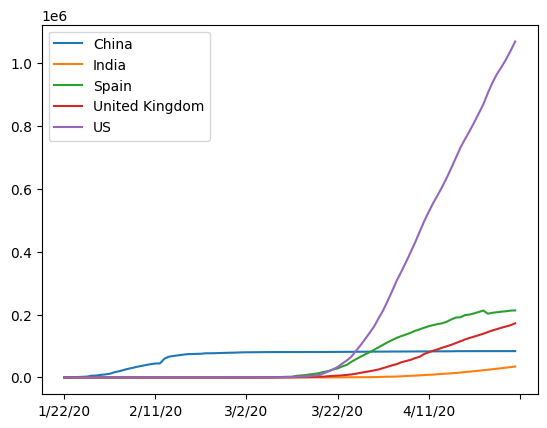

In [13]:
# visualize data related to country
corona_agg.loc['China'].plot()
corona_agg.loc['India'].plot()
corona_agg.loc['Spain'].plot()
corona_agg.loc['United Kingdom'].plot()
corona_agg.loc['US'].plot()
plt.legend()

<Axes: >

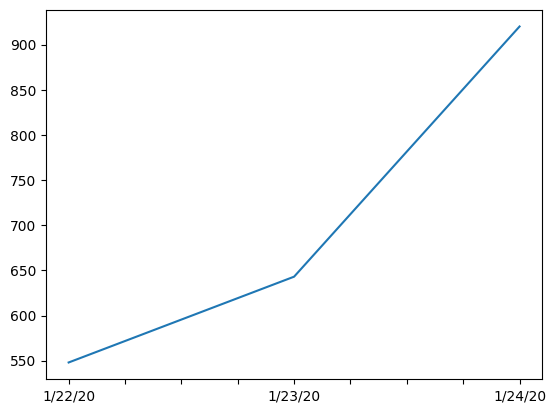

In [14]:
# calculate a good measure
corona_agg.loc['China'][:3].plot()

#### **.diff()** method is used with pandas DataFrames or Series to calculate the difference between consecutive elements along a specified axis. It's a convenient way to compute discrete differences or changes between data points. Here's how you can use it:

<Axes: >

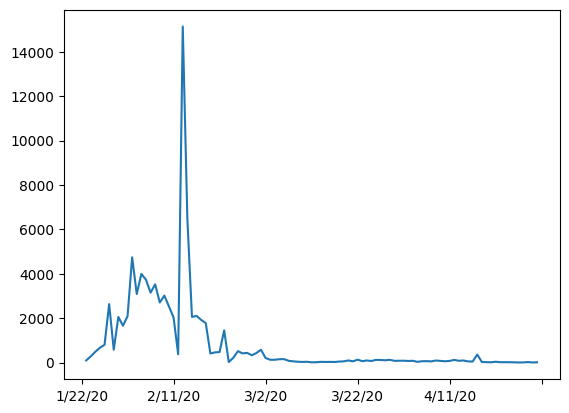

In [15]:
# calculate the rate or first derivative of the curve
corona_agg.loc['China'].diff()
corona_agg.loc['China'].diff().plot()

In [16]:
# maximum infection rate
corona_agg.loc['China'].diff().max()

15136.0

In [17]:
corona_agg.loc['India'].diff().max()

1893.0

In [18]:
Countries = (corona_agg.index)
Countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [19]:
max_infection_rates = []
for i in Countries:
    max_infection_rates.append(corona_agg.loc[i].diff().max())
corona_agg['max_infection_rates'] = max_infection_rates

In [20]:
corona_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [21]:
# create a new dataframe where ther will be only those dates that we want or any other feature
corona_data = pd.DataFrame(corona_agg['max_infection_rates'])

In [22]:
corona_data

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


# Happiness dataset EDA

In [23]:
happiness_report = pd.read_csv("/kaggle/input/covid-19-case-study-eda/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
# drop useless columns
useless_cols = ['Overall rank','Generosity','Perceptions of corruption']
happiness_report.drop(useless_cols, axis =1, inplace = True)

In [25]:
happiness_report

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557
...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555
152,Tanzania,3.231,0.476,0.885,0.499,0.417
153,Afghanistan,3.203,0.350,0.517,0.361,0.000
154,Central African Republic,3.083,0.026,0.000,0.105,0.225


In [26]:
happiness_report.set_index('Country or region',inplace = True)
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [27]:
happiness_report.shape

(156, 5)

In [28]:
corona_data.shape

(187, 1)

In [29]:
# join both datset
data = corona_data.join(happiness_report, how ='inner')

In [30]:
data

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


In [31]:
data.corr() # Carl Pearson method is used here for correlation

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000


<Axes: >

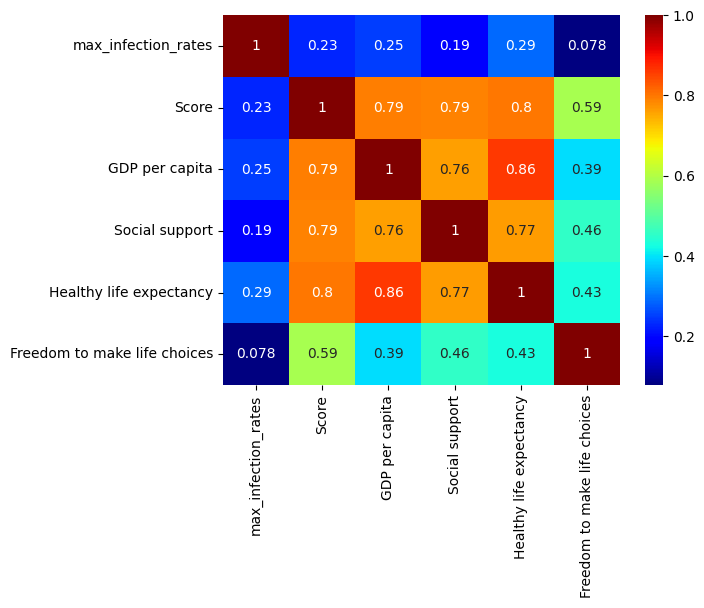

In [32]:
sns.heatmap(data.corr(), annot = True, cmap ='jet')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Freedom to make life choices'),
  Text(0.0, 0, 'max_infection_rates'),
  Text(1.0, 0, 'Score'),
  Text(2.0, 0, 'GDP per capita'),
  Text(3.0, 0, 'Social support'),
  Text(4.0, 0, 'Healthy life expectancy'),
  Text(5.0, 0, 'Freedom to make life choices'),
  Text(6.0, 0, '')])

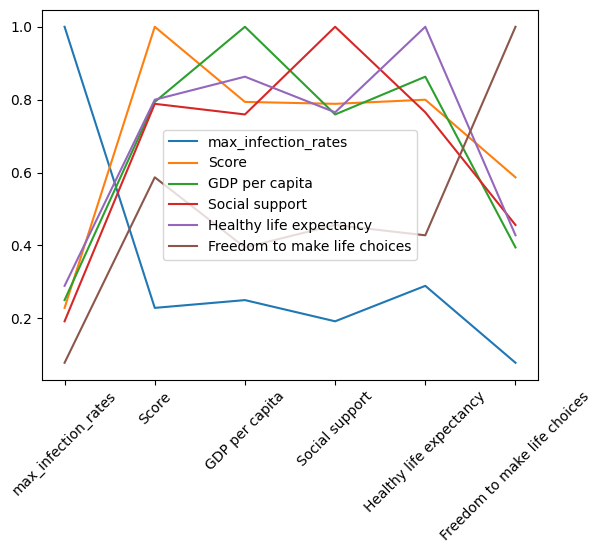

In [33]:
data.corr().plot()
plt.xticks(rotation = 45)

In [34]:
data

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


Text(0, 0.5, 'max_infection_rates')

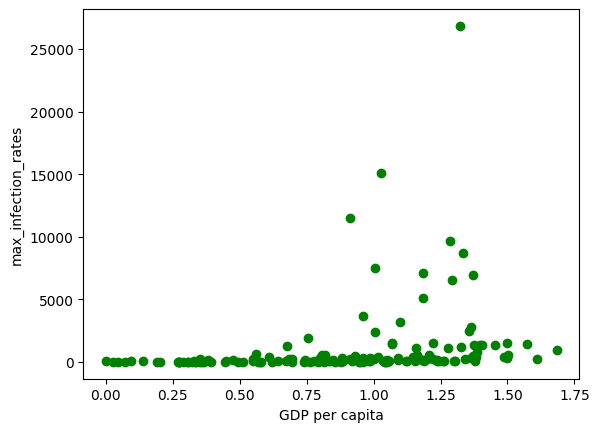

In [35]:
# --viz--
x = data['GDP per capita']
y = data['max_infection_rates']
plt.scatter(x,y, c ='g')
plt.xlabel('GDP per capita')
plt.ylabel('max_infection_rates')


Text(0, 0.5, 'max_infection_rates')

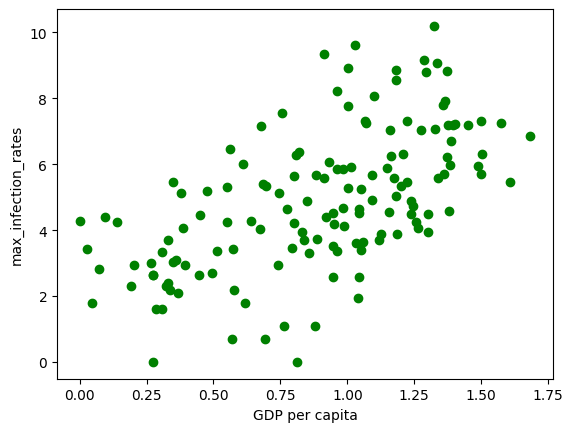

In [36]:
# log scalling for max_infection as the data is highly varied
x = data['GDP per capita']
y = data['max_infection_rates']
plt.scatter(x,np.log(y), c ='g')
plt.xlabel('GDP per capita')
plt.ylabel('max_infection_rates')

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

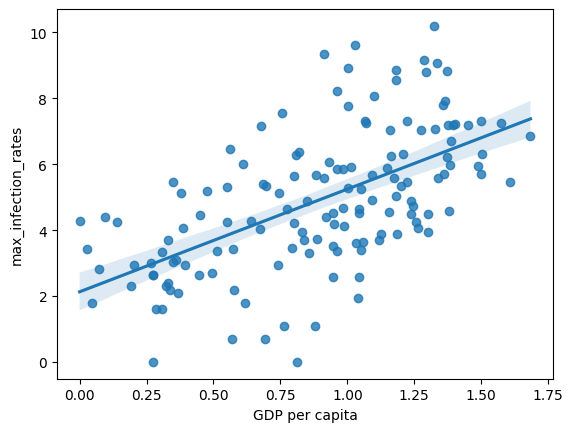

In [37]:
sns.regplot(x =x,y =np.log(y))

In [38]:
!pip install --upgrade seaborn

In [39]:
data

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


<Axes: xlabel='Social support', ylabel='Score'>

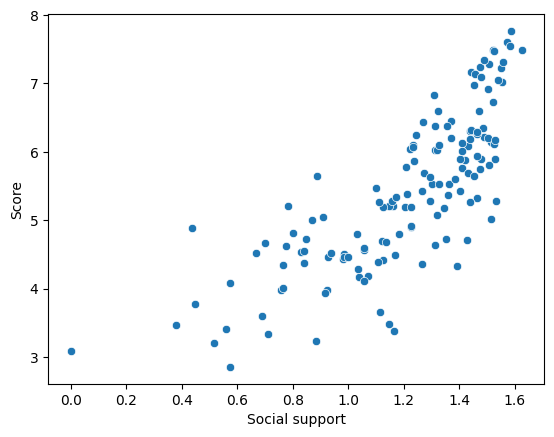

In [40]:
x = data['Social support']
y = data['Score']
sns.scatterplot(x = x , y =y)

<Axes: xlabel='Social support', ylabel='Score'>

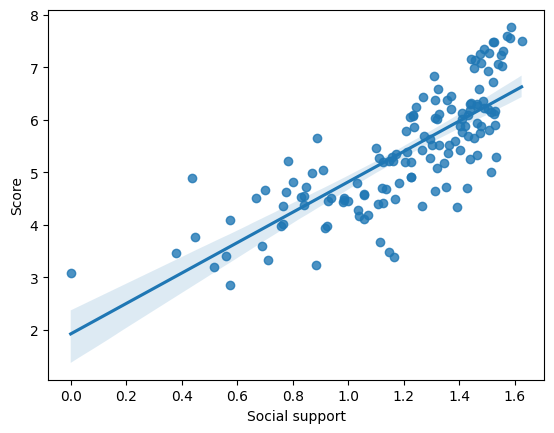

In [41]:
sns.regplot(x = x , y = y)

<Axes: xlabel='Social support', ylabel='Score'>

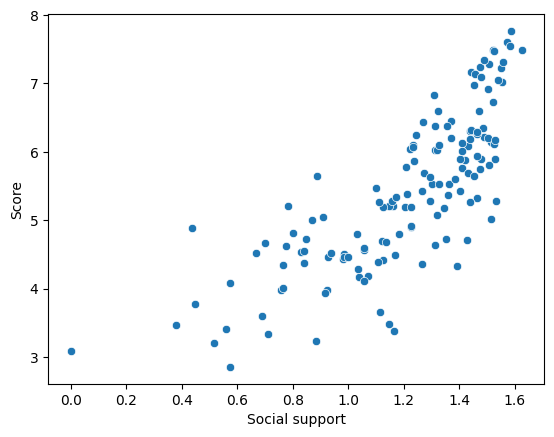

In [42]:
x = data['Social support']
y = data['Score']
sns.scatterplot(x = x , y =y)

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

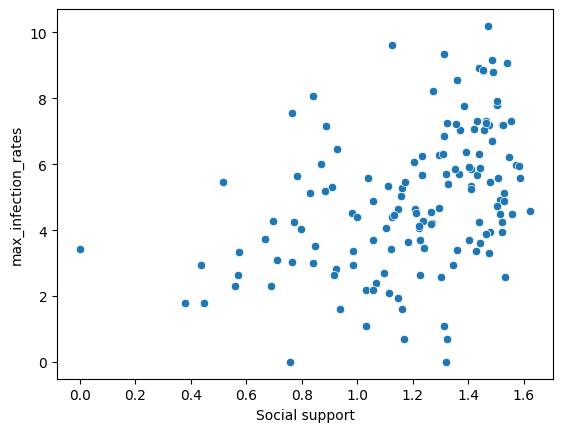

In [43]:
x = data['Social support']
y = data['max_infection_rates']
sns.scatterplot(x = x , y =np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

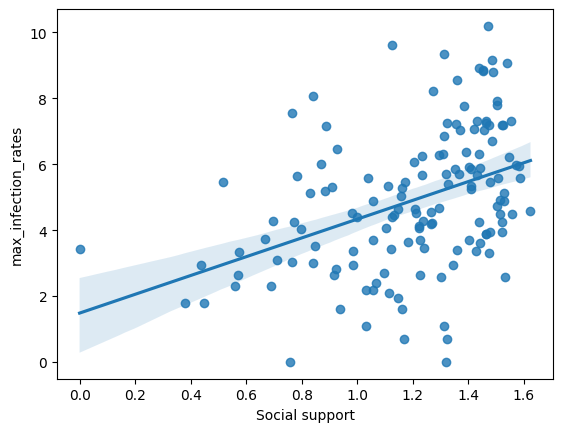

In [44]:
sns.regplot(x = x , y = np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

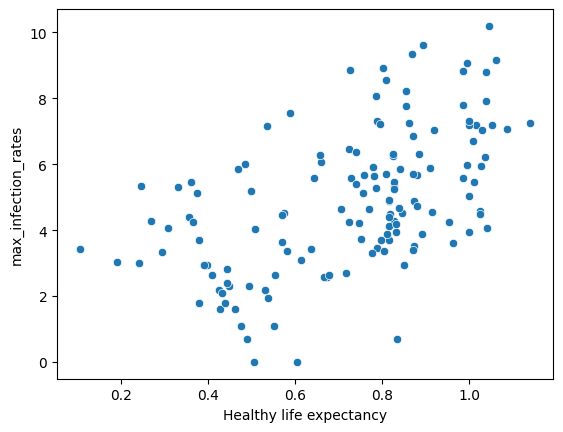

In [45]:
x = data['Healthy life expectancy']
y = data['max_infection_rates']
sns.scatterplot(x = x , y =np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

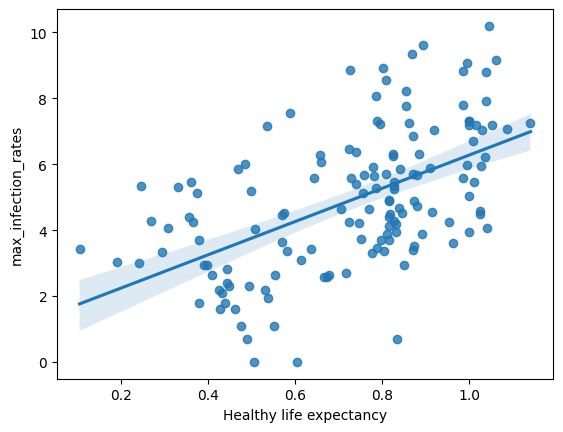

In [46]:
sns.regplot(x = x , y =np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

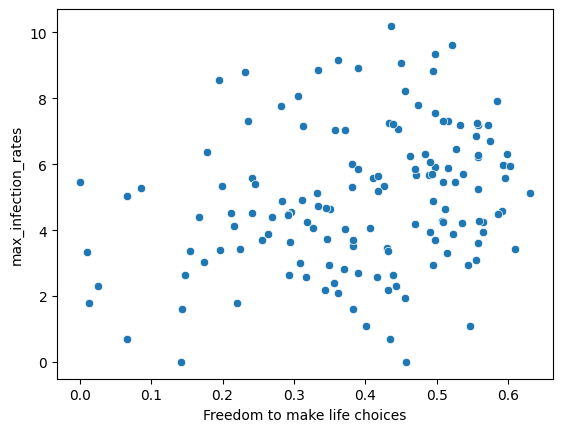

In [47]:
x = data['Freedom to make life choices']
y = data['max_infection_rates']
sns.scatterplot(x = x , y =np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

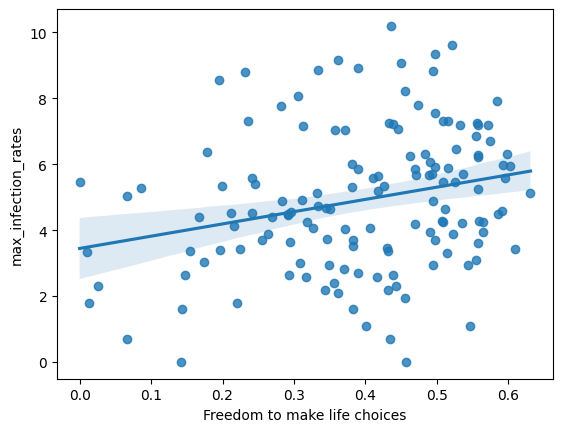

In [48]:
sns.regplot(x = x , y =np.log(y))